In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

import numpy as np
import math

In [8]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 11)

In [9]:
df = web.DataReader("INV", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-19,134.949997,134.949997,134.949997,134.949997,0.0,134.949997
2019-08-20,134.949997,134.949997,134.949997,134.949997,0.0,134.949997
2019-08-21,134.949997,134.949997,134.949997,134.949997,0.0,134.949997
2019-09-06,140.000000,140.000000,140.000000,140.000000,0.0,140.000000
2019-09-11,137.000000,137.000000,137.000000,137.000000,135.0,137.000000


In [10]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [11]:
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'3.1.1'

In [13]:
style.use('ggplot')

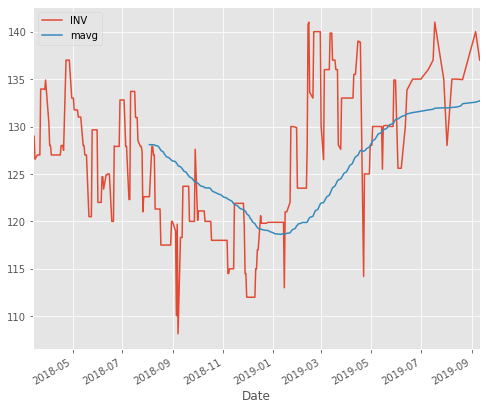

In [14]:
close_px.plot(label='INV')
mavg.plot(label='mavg')
plt.legend()

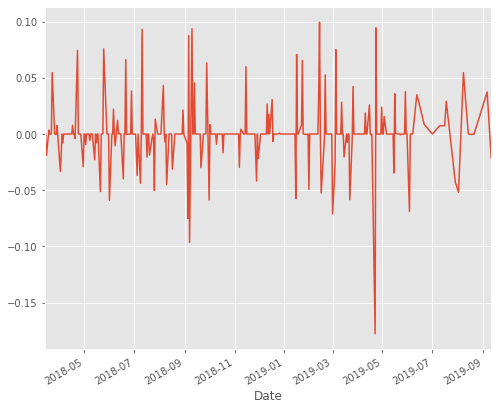

In [15]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [16]:
dfcomp = web.DataReader(['IVZ', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [17]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Text(0, 0.5, 'Returns GE')

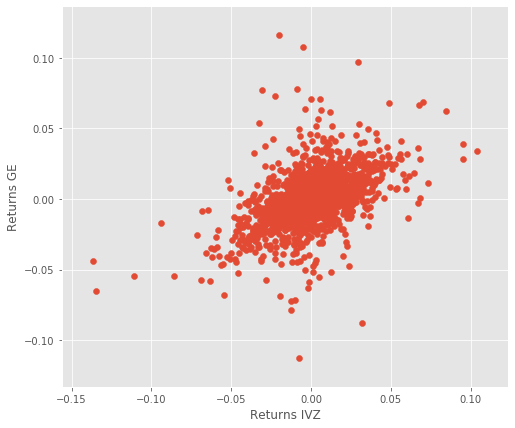

In [18]:
plt.scatter(retscomp.IVZ, retscomp.GE)
plt.xlabel('Returns IVZ')
plt.ylabel('Returns GE')

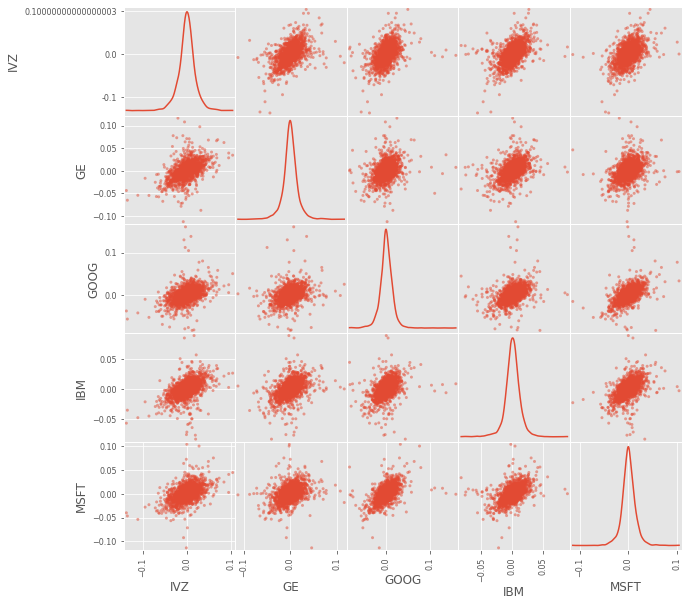

In [19]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

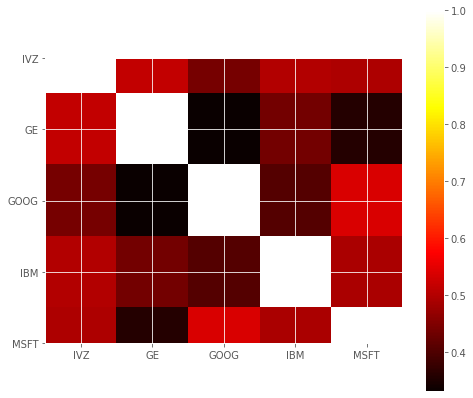

In [20]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

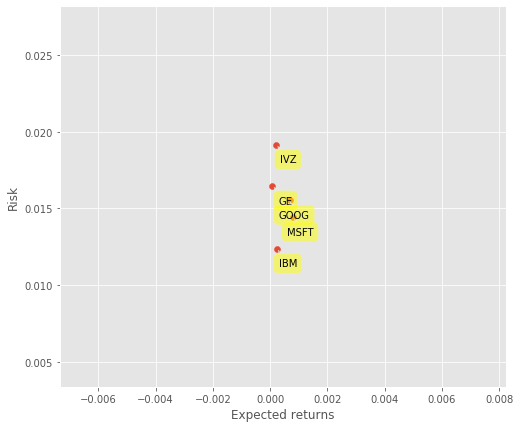

In [21]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [22]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0